# 8. Anomaly Detection and Recommender Systems

- 작성자: [JWarmenhoven's Exercise 8](https://nbviewer.jupyter.org/github/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/Programming%20Exercise%208%20-%20Anomaly%20Detection%20and%20Recommender%20Systems.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

%matplotlib inline
import seaborn as sns
sns.set_context("notebook")
sns.set_style("white")

### Anomaly Detection
- 초기 학습은 Unsupervised Learning, 평가는 Supervised Learning
- 비이상적으로 차이가 나는 포인트(들)을 찾아내는 것.

#### first example

In [3]:
data1 = loadmat("/content/drive/My Drive/study/ML(Andrew Ng)/data/ex8data1.mat")
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:
X1 = data1['X']
print("X1:", X1.shape)

X1: (307, 2)


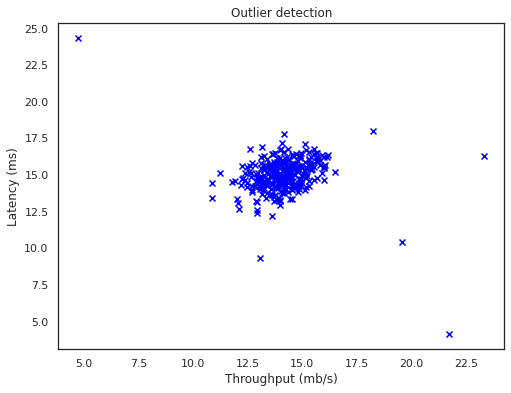

In [5]:
plt.figure(figsize = (8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c = 'b', marker = 'x')

plt.title("Outlier detection")
plt.ylabel("Latency (ms)")
plt.xlabel("Throughput (mb/s)")
plt.show()

일단 저기 (5.X, 24.X) 점은 이상치일 것으로 보입니다.

In [19]:
clf = EllipticEnvelope()
clf.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

In [20]:
xx, yy = np.meshgrid(np.linspace(0, 25, 200), np.linspace(0, 30, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [21]:
y_pred = clf.decision_function(X1).ravel()
percent = 1.9
threshold = np.percentile(y_pred, percent)
outliers = y_pred < threshold

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

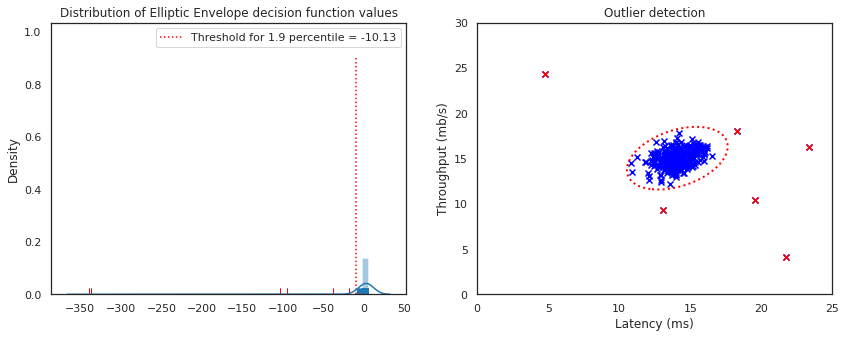

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
sns.distplot(y_pred, rug = True, ax = ax1)
sns.distplot(y_pred[outliers], rug = True, hist = False, kde = False, norm_hist = True,
             color = 'r', ax = ax1)
ax1.vlines(threshold, 0, 0.9, colors = 'r', linestyles = "dotted",
           label = f"Threshold for {percent} percentile = {np.round(threshold, 2)}")

ax1.set_title("Distribution of Elliptic Envelope decision function values")
ax1.legend(loc = "best")

ax2.scatter(X1[:, 0], X1[:, 1], c = 'b', marker = 'x')
ax2.scatter(X1[outliers][:, 0], X1[outliers][:, 1], c = 'r', marker = 'x', linewidths = 2)
ax2.contour(xx, yy, Z, levels = [threshold], linewidths = 2, colors = 'r', linestyles = "dotted")

ax2.set_title("Outlier detection")
ax2.set_xlabel("Latency (ms)")
ax2.set_ylabel("Throughput (mb/s)")

plt.show()

저번 학기(2020, 1)에도 decision function 때문에 문제가 생겼던 것 같은데, 분명 EllipticEnvelope은 분산을 이용하는데, 왜 norm histogram을 만들었는데 저렇게 나올까..

#### Recommender Systems

In [27]:
data2 = loadmat("/content/drive/My Drive/study/ML(Andrew Ng)/data/ex8_movies.mat")
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [28]:
Y = data2['Y']
R = data2['R']
print(f"Y: {Y.shape}, R: {R.shape}")

Y: (1682, 943), R: (1682, 943)


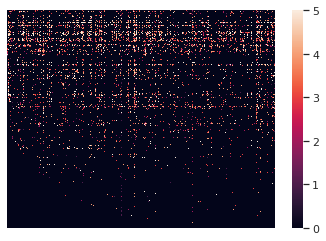

In [29]:
sns.heatmap(Y, xticklabels = False, yticklabels = False)

얜 예시랑 다르게 색반전된 color map을 골랐네..